# Linear Regression on Multivarible 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [6]:
#read_file = pd.read_excel (r"D:\Coding\Learn_Python\Data\Training_Dataset_ME5201.xlsx")
#read_file.to_csv (r"D:\Coding\Learn_Python\Data\Training_Dataset_ME5201.csv", index = None, header=True)

In [7]:
df = pd.read_csv(r"D:\Coding\Learn_Python\Data\Training_Dataset_ME5201.csv")
df

,density,bulk_modulus,speed
0,818,1980000000,1449.28
1,1600,1870000000,1010.10
2,1830,2120000000,1002.51
3,1780,1720000000,919.54
4,1380,1780000000,1066.67
...,...,...,...
995,1900,1940000000,945.63
996,1200,1060000000,883.00
997,1820,2260000000,1041.67
998,1660,1940000000,1010.10


# None of the cell is empty

In [8]:
df.isnull().sum()

density         0
bulk_modulus    0
speed           0
dtype: int64

# np.shape(df) command help us to provide No. of Rows & Columns.

In [9]:
np.shape(df)

(1000, 3)

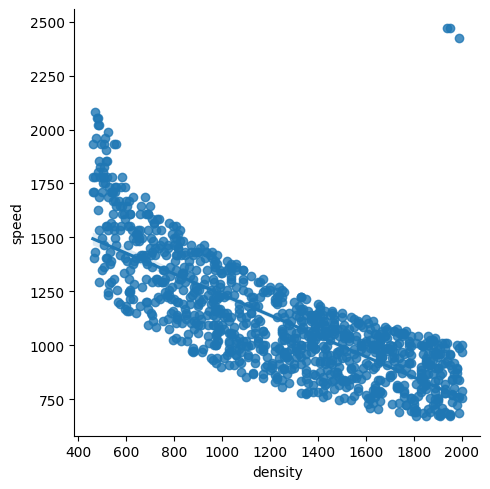

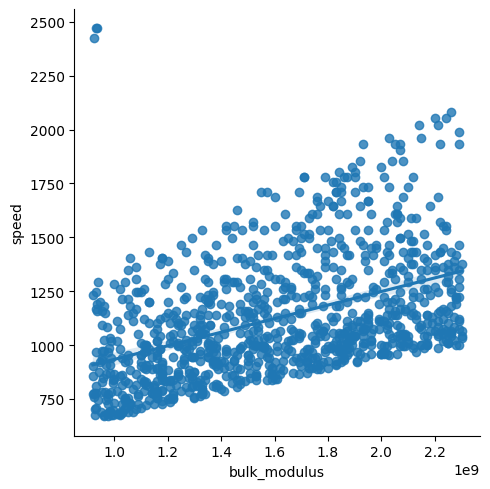

In [10]:
sns.lmplot(x="density", y="speed", data  = df)
sns.lmplot(x="bulk_modulus", y="speed", data  = df)

# With help of these graphs, we can see that, Density and Bulk Modulus have a correlation with Speed

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,2:]

In [12]:
X

,density,bulk_modulus
0,818,1980000000
1,1600,1870000000
2,1830,2120000000
3,1780,1720000000
4,1380,1780000000
...,...,...
995,1900,1940000000
996,1200,1060000000
997,1820,2260000000
998,1660,1940000000


In [13]:
y

,speed
0,1449.28
1,1010.10
2,1002.51
3,919.54
4,1066.67
...,...
995,945.63
996,883.00
997,1041.67
998,1010.10


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

800 200


In [15]:
df.describe()

,density,bulk_modulus,speed
count,1000.000000,1.000000e+03,1000.000000
mean,1233.425000,1.602401e+09,1123.256940
std,442.057335,3.995763e+08,282.279194
min,462.000000,9.200000e+08,670.020000
25%,865.000000,1.260000e+09,925.930000
50%,1250.000000,1.590000e+09,1058.200000
75%,1620.000000,1.940000e+09,1269.840000
max,2000.000000,2.300000e+09,2469.140000


In [16]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [17]:
pd.DataFrame(X_train).describe()

,0,1
count,800.000000,800.000000
mean,0.501402,0.497384
std,0.286648,0.293121
min,0.000000,0.000000
25%,0.252926,0.245830
50%,0.515605,0.492386
75%,0.752926,0.746193
max,1.000000,1.000000


In [18]:
pd.DataFrame(X_test).describe()

,0,1
count,200.000000,200.000000
mean,0.502276,0.481099
std,0.291230,0.276223
min,0.000000,-0.000725
25%,0.274870,0.245830
50%,0.492848,0.485134
75%,0.759428,0.697244
max,1.000000,0.992748


In [19]:
X_train

array([[0.14629389, 0.1515591 ],
       [0.61638492, 0.862219  ],
       [0.19310793, 0.39086294],
       ...,
       [0.29193758, 0.78970268],
       [0.65539662, 0.27483684],
       [0.23016905, 0.75344453]])

In [20]:
X_test

array([[ 8.04941482e-01,  3.76359681e-01],
       [ 9.54486346e-01,  7.96954315e-01],
       [ 6.29388817e-01,  9.41986947e-01],
       [ 9.60988296e-01,  9.63741842e-01],
       [ 2.84135241e-01,  1.66062364e-01],
       [ 3.12093628e-02,  7.82451051e-01],
       [ 5.90377113e-01,  5.57650471e-01],
       [ 1.08582575e-01,  9.35460479e-02],
       [ 2.13914174e-01,  8.54967368e-01],
       [ 6.03381014e-01,  8.25960841e-01],
       [ 5.77373212e-01,  3.61856418e-01],
       [ 2.33420026e-01,  4.92385787e-01],
       [ 8.95968791e-01,  7.24437999e-01],
       [ 7.59427828e-01,  3.98114576e-01],
       [ 3.95318596e-01,  1.80565627e-01],
       [ 4.66840052e-01,  4.19869471e-01],
       [ 3.62808843e-01,  6.30166788e-01],
       [ 7.07412224e-01,  9.49238579e-01],
       [ 6.68400520e-01,  4.99637418e-01],
       [ 3.75812744e-01,  4.34372734e-01],
       [ 1.15734720e-01,  3.90862944e-01],
       [ 9.67490247e-01,  8.25960841e-01],
       [ 7.72431730e-01,  1.58810732e-01],
       [ 5.

### We can see that our dataset has been cutdown in 2 piece with ratio of 8:2. 20% in Test Dataset and 80% in Training Dataset 

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mse1= mean_squared_error(y_train,model.predict(X_train))
mae1= mean_absolute_error(y_train,model.predict(X_train))
raq1 = r2_score(y_train, model.predict(X_train))
print(mse1)
print(mae1)
print(raq1)

19581.51316196561
65.93248602236183
0.7636217740605951


In [23]:
mse2= mean_squared_error(y_test,model.predict(X_test))
mae2= mean_absolute_error(y_test,model.predict(X_test))
raq2 = r2_score(y_test, model.predict(X_test))
print(mse2)
print(mae2)
print(raq2)

5428.169870187041
56.75077145048133
0.9182581572231903


In [24]:
print(model.coef_, model.intercept_)

[[-753.13716535  450.64066245]] [1280.23318726]


Here we can see that, our model does not give good score for training data, but It gives more accurate data with test data. That means our model has not understand the data correctly still it can give correct prediction. which shows that this is the case of Underfitting.